# CS 449 Final Project Update

Due: May 23, 2023 at 11:59pm

## 1. Names and Net IDs

>Hong Wang: hyw6229 \
Nino Maruszewski: nvm6986 \
Andrew Pulver: ajp2637 \
Jordan Checkoff: jbc6837

## 2. Abstract

*Write a new abstract that describes the motivation for your project and proposed methods. This should reflect any changes you've made, but you'll explain those changes later.*

>Our final project seeks to build a convolutional neural network to classify satellite images from the resisc45 dataset. We will compare the accuracy of our CNN to a logistic regression model. We will also further train our CNN on rotated dataset images and GAN-produced images to attempt to further improve the model.

## 3. Big Changes

*Describe any major changes that have taken your project in a new direction. What made you decide to make these changes? Were some things easier or harder than you expected?*

>It was easier than we expected to create a CNN that achieves decent accuracy. Originally, it achieved ~30% testing accuracy, and after some fine-tuning it achieved ~45% accuracy. Given that we have 45 different classes of images. This result is not bad.
>
>Because making this basic CNN was easier than we expected, we are planning to now spend more time creating a GAN for our dataset and training our model using those images as well. We will also spend more time fine-tuning our CNN.

## 4a. Describe your dataset(s)

*This should be an updated version of your datasets section from your proposal. Write this section as if the reader hasn't read your original proposal. List the datasets you're using, where you found them, and what they contain. Be detailed! For each dataset, what does the data look like? What is the data representation? (e.g., what resolution of images? what length of sequences?) How is the data annotated or labeled? Include citations for the datasets. Include at least one citation of previous work that has used this data, or an explanation of why it hasn't been used before*

>We are using the resisc45 dataset which was found from the tensorflow dataset library. It contains 31,500 satellite images (jpg format) that are 256x256 pixels which contains RGB of their labeled classes. The dataset has 45 different classes with each class containing 700 images. The dataset in the code is represented by three 2d tensor arrays containing their RGB values at position (x, y). The data is labeled by not only the folder they are in, but also their image name. For example, one image is named "snowberg_609.jpg" in the snowberg file. 
>
>This dataset is used in the category of Remote Sensing Image Scene Classification (RESISC) produced by Northwestern Polytechnical University (NWPU). According to [wikipedia](https://en.wikipedia.org/wiki/Remote_sensing), remote sensing is the acquisition of information about an object without making contact. In our case, the remote sensing are the satellite images.

### Citation

>Dataset Citation \
&nbsp; “Resisc45 | TensorFlow Datasets.” TensorFlow, www.tensorflow.org/datasets/catalog/resisc45. Accessed 22 Apr. 2023.

>Citation of previous work \
&nbsp; Cheng, Gong, Junwei Han, and Xiaoqiang Lu. “Remote Sensing Image Scene Classification: Benchmark and State of the Art.” Proceedings of the IEEE 105, no. 10 (October 2017): 1865–83. https://doi.org/10.1109/jproc.2017.2675998.

## 4b. Load your dataset(s)

*Load at least a few examples and visualize them as best you can*

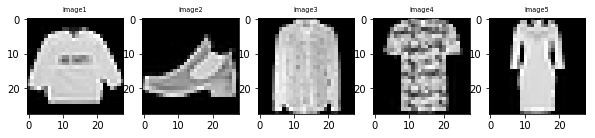

C:\Users\Hong\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\Hong\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


Using downloaded RESISC45.


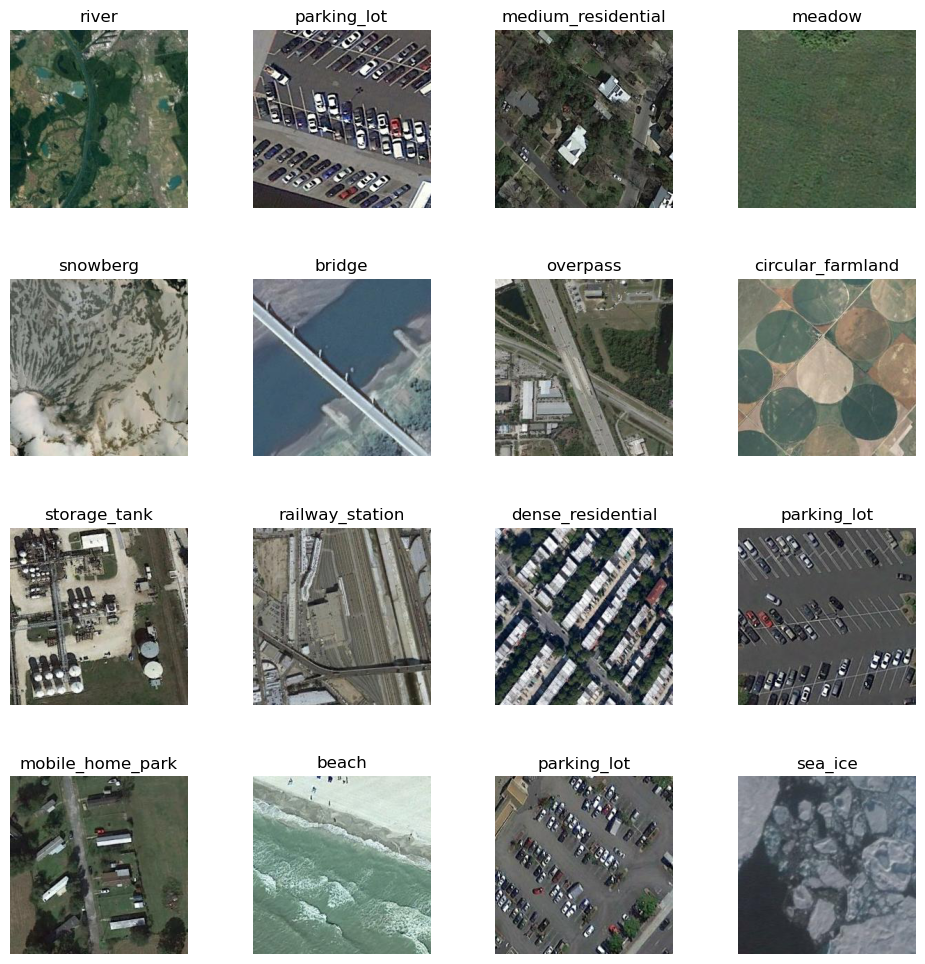

In [1]:
import os
from pathlib import Path

import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt

import gdown

RESISC45_DIR = Path(".") / "NWPU-RESISC45"

# Download the RESISC45 dataset if needed
# We *should* do this right, but this workss
if not RESISC45_DIR.exists():
    print("Downloading RESISC45.")
    
    gdown.download(
        id="1nd0R9iljzkWd7Hhfyp2tH55KxAsKrzYj",
        output="NWPU-RESISC45.rar",
        quiet=False,
    )
    os.system("7z x NWPU-RESISC45.rar")
    os.system("rm NWPU-RESISC45.rar")
else:
    print("Using downloaded RESISC45.")
    

# Define the parameters for data loading
image_size = (256, 256)
batch_size = 32

# Load the Resisc45 dataset using ImageFolder
train_dataset = ImageFolder(RESISC45_DIR)

# Display the images from the dataset
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.ravel()
for i in range(16):
    sample = torch.randint(0, 31500, size=(1,)).item()
    img, label = train_dataset[sample]
    axes[i].imshow(img)
    axes[i].set_title(train_dataset.classes[label])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()

## 4c. Small dataset

*Describe the small dataset you constructed as requested in the project proposal. How many examples did you use? How large was the dataset in total?*

> Our current size is 405 MB with 31,500 images. Base on these numbers, we get that we can sample around 17 images per class where there is 45 classes to have a small dataset under 10 MB. To make it easier, we will sample 15 images per class for 675 images total.

## 5. Updated Methods

*This should be an updated version of your methods section from your proposal. Write this section as if the reader hasn't read your original proposal. For example:*

> First, we will use logistic regression to get a baseline accuracy
>
> Then, we will attempt to improve on this baseline by using a Convolutional Neural Network. We will experiment with using different values for padding, stride, dilation, and learning rate, as well as with using different CNN architectures. We will use Cross Entropy Loss for our loss function. This loss function is easy for a neural network performing classification to learn on.
>
> Next, we will attempt to further improve our CNN through data augmentation. This will include rotating the images in our dataset, collecting satellite images of Evanston, and using a GAN to create new images.
>
> Finally, we will attempt to protect our model against adversarial attacks by training it on perturbed images

> Citation: Cheng, Gong, Junwei Han, and Xiaoqiang Lu. “Remote Sensing Image Scene Classification: Benchmark and State of the Art.” Proceedings of the IEEE 105, no. 10 (October 2017): 1865–83. https://doi.org/10.1109/jproc.2017.2675998.

## 6. Proposed Deliverables

*Copy the deliverables from your proposal and write a sentence saying whether you completed this goal, made progress on this goal, or abandoned this goal. Unless you completed the goal, give an explanation of how it went.*

### 6.1 Previous Essential Goals
- We will use logistic regression as our baseline model 
  * We completed this goal by using the `sklearn` packages.
- We will create a simple CNN architecture to compare against our baseline models
  * We completed this goal by using a microsoft [guide](https://learn.microsoft.com/en-us/windows/ai/windows-ml/tutorials/pytorch-train-model) to create a basic cnn for image classification and changed it to meet the need of our dataset.

### 6.2 Previous Desired Goals
- See how data augmentation (i,e rotating the images) affects our baseline CNN models performance
  * We have begun investigating functions to help us rotate the images and we already have our baseline cnn model from the essential goals.
- Take satellite images of Evanston and correctly classify image segments. Evanston data is available through the Google Maps API. We will set the resolution, zoom, and image size through the Google Maps API to be similar to that of our training data. These parameters can be set using the Google Maps API. We will manually label the images. We will collect satellite images from both summer and winter for comparison.
   * Have not yet started
- We will explore changes in the architecture and parameters of the CNN, including number of layers, layer sizes, filter size, stride, padding, and different activation functions, to see which set of parameter provides the best performance. We will start with a filter size of 3x3 and increase the filter size by 2x2 to find the optimal size. We will test RELU, sigmoid, and tanh activation functions.
    * We are currently working on this goal - so far, we've improved from ~30% testing accuracy to ~45% testing accuracy by changing the architecture and parameters of the CNN

### 6.3 Previous Stretch Goals
- We will create new images using a GAN technique to increase the size of our dataset and improve the model.
   * Have not yet started
- We will attempt an adversarial attack on our model, then train our model on perturbed images, and then attempt an adversarial attack again to check for greater robustness.
    * Have not yet started

## 7. Results So Far

*Show the results of your methods trained on your data. You should at least have empirical results for the small dataset described in 4c. Unless you are doing generation or another task where simple models (e.g., linear regression or logistic regression) aren't applicable, we strongly encourage you to compare your initial results against a simple baseline. If you have additional results, you're welcome to include those as well.*

> Our logistic regression with a 80-20 train test split achieved an amazing 1.71%. While logistic regression on 20-80 train test split achieve an astounding 2.15%. Our baseline cnn model achieved an accuracy of 43%. All results were base on the complete dataset.

## 8. New Deliverables

*For any proposed deliverables that you did NOT complete or abandon, copy them into these lists below. Then, if you have abandoned or completed your Desired or Stretch goals, add new goals until you have at least two goals per category.*

8.1 New Essential Goals

- No new goals and completed old

8.2 New Desired Goals

- See how data augmentation (i,e rotating the images) affects our baseline CNN models performance
       
- Take satellite images of Evanston and correctly classify image segments. Evanston data is available through the Google Maps API. We will set the resolution, zoom, and image size through the Google Maps API to be similar to that of our training data. These parameters can be set using the Google Maps API. We will manually label the images. We will collect satellite images from both summer and winter for comparison.

- We will explore changes in the architecture and parameters of the CNN, including number of layers, layer sizes, filter size, stride, padding, and different activation functions, to see which set of parameter provides the best performance. We will start with a filter size of 3x3 and increase the filter size by 2x2 to find the optimal size. We will test RELU, sigmoid, and tanh activation functions.

8.3 New Stretch Goals

- We will create new images using a GAN technique to increase the size of our dataset and improve the model.

- We will attempt an adversarial attack on our model, then train our model on perturbed images, and then attempt an adversarial attack again to check for greater robustness.


## 9. Hopes and Concerns

*What's gone well so far? What's been the hardest thing?*

> We haven't run into any issues so far, but the hardest thing has been improving our CNN's accuracy

## 10. References

*Cite the papers or sources that you used to discover your datasets and/or models, if you didn't include the citation above. For example:*

> Cole, Robin M. “Satellite-Image-Deep-Learning.” GitHub, 22 Apr. 2023, github.com/satellite-image-deep-learning/techniques. Accessed 22 Apr. 2023.